## All tasks from the textbook

## Task 1

8 first entries

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('NationalNames.csv')

data.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


## Task 2

last 8 entries

In [3]:
data.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


## Task 3

Column names

In [4]:
print(data.columns)

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')


## Task 4

general statistical data

In [5]:
data.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


## Task 5

number of unique names in a file

In [6]:
print(data['Name'].nunique())

93889


## Task 6

number of unique names by gender

In [7]:
unique_female_names = data[data['Gender'] == 'F']['Name'].nunique()
unique_male_names = data[data['Gender'] == 'M']['Name'].nunique()

print(f"F: {unique_female_names}")
print(f"M: {unique_male_names}")

F: 64911
M: 39199


## Task 7 

5 most popular men name in 2010

In [8]:
male_names_2010 = data[(data['Year'] == 2010) & (data['Gender'] == 'M')]

top_male_names_2010 = male_names_2010.groupby('Name').sum().sort_values(by='Count', ascending=False).head(5)

print(top_male_names_2010['Count'])

Name
Jacob      22082
Ethan      17985
Michael    17308
Jayden     17152
William    17030
Name: Count, dtype: int64


## Task 8

find most popular name by all years in one particular year

In [9]:
most_popular_name_overall = data.loc[data['Count'].idxmax()]
print(most_popular_name_overall)

Id        431053
Name       Linda
Year        1947
Gender         F
Count      99680
Name: 431052, dtype: object


## Task 9

find the least popular name by all years in one particular year(by count)

In [10]:
min_count = data['Count'].min()

num_entries_min_count = (data['Count'] == min_count).sum()

print(num_entries_min_count)

254615


## Task 10

number of unique names each year

In [11]:
unique_names_per_year = data.groupby('Year')['Name'].nunique()

print(unique_names_per_year)

Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64


## Task 11

year with the max unique names

In [12]:
print(unique_names_per_year.idxmax())
print(unique_names_per_year.max())

2008
32488


## Task 12

most popular name in a year with the most unique names

In [13]:
year_with_most_unique_names = data.groupby('Year')['Name'].nunique().idxmax()

data_in_year = data[data['Year'] == year_with_most_unique_names]
most_popular_name = data_in_year.loc[data_in_year['Count'].idxmax(), 'Name']

most_popular_name

'Jacob'

## Task 13

year when the most popular name was the most popular women's name

In [14]:
filtered_data = data[(data['Name'] == most_popular_name) & (data['Gender'] == 'F')]

yearly_counts = filtered_data.groupby('Year')['Count'].sum()
year_most_popular_female = yearly_counts.idxmax()

year_most_popular_female

2004

## Task 14

find a year with the most gender neutral names

In [16]:
gender_data = data.pivot_table(index=['Year', 'Name'], columns='Gender', values='Count', aggfunc='sum').reset_index()

gender_neutral_names = gender_data.dropna(subset=['F', 'M'])
gender_neutral_names_per_year = gender_neutral_names.groupby('Year').size()
year_with_most_gender_neutral_names = gender_neutral_names_per_year.idxmax()

year_with_most_gender_neutral_names

2008

## Task 15

number of births per year

In [17]:
births_per_year = data.groupby('Year')['Count'].sum()

print(births_per_year)

Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64


## Task 16

year where the most children were born

In [19]:
print(births_per_year.idxmax())

1957


## Task 17

number of births per year per gender

In [20]:
births_per_year_gender = data.groupby(['Year', 'Gender'])['Count'].sum()

print(births_per_year_gender)

Year  Gender
1880  F           90993
      M          110491
1881  F           91954
      M          100745
1882  F          107850
                 ...   
2012  M         1889414
2013  F         1745339
      M         1881463
2014  F         1768775
      M         1901376
Name: Count, Length: 270, dtype: int64


## Task 18

number of years where there were more girls born than boys

In [21]:
births_per_year_gender = data.groupby(['Year', 'Gender'])['Count'].sum().unstack()

num_years_more_girls = (births_per_year_gender['F'] > births_per_year_gender['M']).sum()

num_years_more_girls

54

## Task 19

plot birthes per year by gender

<Figure size 1000x600 with 0 Axes>

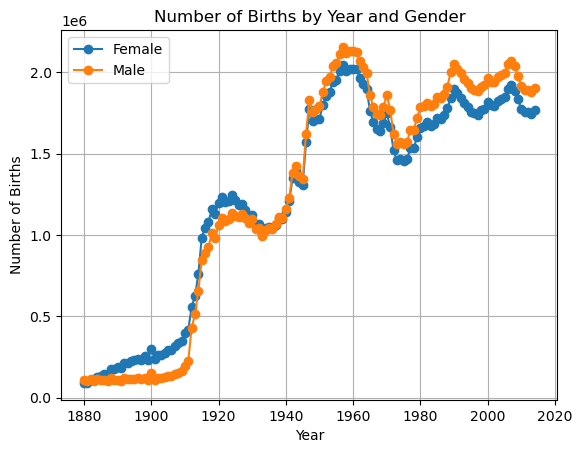

In [22]:
import matplotlib.pyplot as plt

births_per_year_gender = data.groupby(['Year', 'Gender'])['Count'].sum().unstack()

plt.figure(figsize=(10, 6))
births_per_year_gender.plot(kind='line', marker='o')
plt.title('Number of Births by Year and Gender')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.grid(True)
plt.legend(['Female', 'Male'])
plt.show()

## Task 20

number of gender neutral names by all years

In [23]:
female_names = data[data['Gender'] == 'F']['Name'].unique()
male_names = data[data['Gender'] == 'M']['Name'].unique()

gender_neutral_names = np.intersect1d(female_names, male_names)

num_gender_neutral_names = len(gender_neutral_names)

num_gender_neutral_names

10221

## Task 21

number of events when the boy was called 'Barbara'

In [24]:
barbara_boys = data[(data['Name'] == 'Barbara') & (data['Gender'] == 'M')]
num_barbara_boys = barbara_boys['Count'].sum()

num_barbara_boys

4139

## Task 22

For how long was the data being collected

In [25]:
earliest_year = data['Year'].min()
latest_year = data['Year'].max()

duration_years = latest_year - earliest_year

duration_years

134

## Task 23

most popular gender neutral names

In [27]:
gender_neutral_names = data.groupby('Name').filter(lambda x: len(x['Gender'].unique()) > 1)

popular_gender_neutral_names = gender_neutral_names.groupby('Name')['Count'].sum()
popular_gender_neutral_names_sorted = popular_gender_neutral_names.sort_values(ascending=False)

popular_gender_neutral_names_sorted.head()

Name
James      5129096
John       5106590
Robert     4816785
Michael    4330805
Mary       4130441
Name: Count, dtype: int64

## Task 24

the least popular name

In [28]:
total_counts_per_name = data.groupby('Name')['Count'].sum()

least_popular_name = total_counts_per_name.idxmin()
least_popular_count = total_counts_per_name.min()

(least_popular_name, least_popular_count)

('Aabid', 5)

## Task 25

plot 'John' and 'Mary' number of names by year without bounding to gender

<Figure size 1200x600 with 0 Axes>

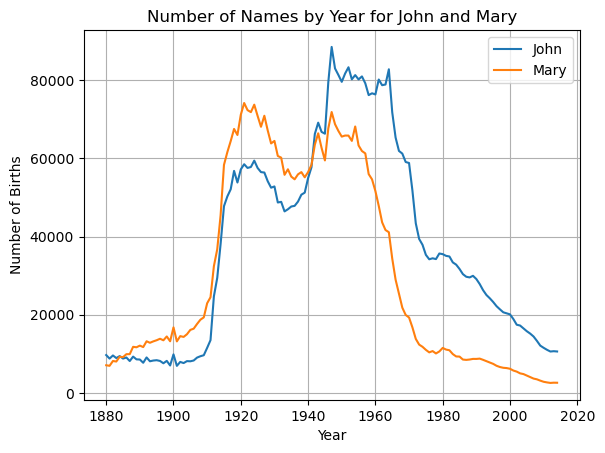

In [29]:
john_mary_data = data[data['Name'].isin(['John', 'Mary'])]

john_mary_yearly = john_mary_data.groupby(['Year', 'Name'])['Count'].sum().unstack()

plt.figure(figsize=(12, 6))
john_mary_yearly.plot(kind='line')
plt.title('Number of Names by Year for John and Mary')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend(['John', 'Mary'])
plt.grid(True)
plt.show()

## Task 26

plot female 'John' and male 'Mary' number of names by year

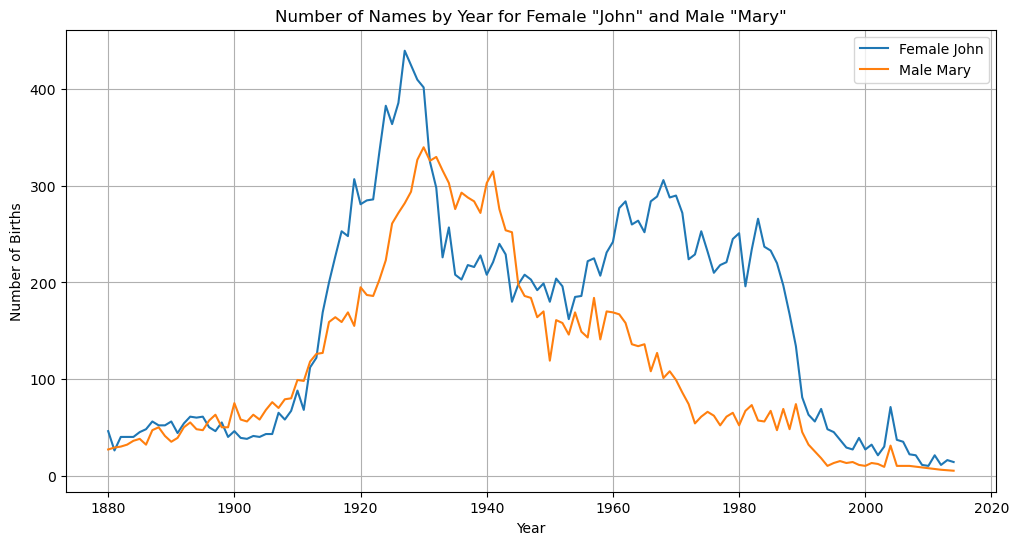

In [30]:
female_john = data[(data['Name'] == 'John') & (data['Gender'] == 'F')]
male_mary = data[(data['Name'] == 'Mary') & (data['Gender'] == 'M')]

female_john_yearly = female_john.groupby('Year')['Count'].sum()
male_mary_yearly = male_mary.groupby('Year')['Count'].sum()

plt.figure(figsize=(12, 6))
plt.plot(female_john_yearly, label='Female John')
plt.plot(male_mary_yearly, label='Male Mary')
plt.title('Number of Names by Year for Female "John" and Male "Mary"')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend()
plt.grid(True)
plt.show()

## Task 27

find most popular name at each year

In [31]:
name_counts_per_year = data.groupby(['Year', 'Name'])['Count'].sum().reset_index()

most_popular_name_per_year = name_counts_per_year.loc[name_counts_per_year.groupby('Year')['Count'].idxmax()]

most_popular_name_per_year

,Year,Name,Count
955,1880,John,9701
2818,1881,John,8795
4735,1882,John,9597
6727,1883,John,8934
8775,1884,John,9428
...,...,...,...
1521288,2010,Isabella,22913
1568092,2011,Sophia,21839
1599369,2012,Sophia,22285
1630271,2013,Sophia,21172
